In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import util
import numpy as np
from math import e, log, tan, sqrt
from scipy.signal import spectrogram

def calculate_pump_performance(pressure_start, pressure_end, pressure_start2, pressure_end2, pressure_start3, pressure_end3):
    return (pressure_start - pressure_end) / (pressure_start2 - pressure_end2)

df_05Hz = pd.read_csv('data/new/4,4-4,0-0,5G.csv', index_col=None, header=None)
df_1Hz = pd.read_csv('data/new/4,4-4,35-1G.csv', index_col=None, header=None)
df_2Hz = pd.read_csv('data/new/4,4-4,35-2G.csv', index_col=None, header=None)

v_05Hz = df_05Hz.to_numpy().flatten()
v_1Hz = df_1Hz.to_numpy().flatten()
v_2Hz = df_2Hz.to_numpy().flatten()

def get_most_frequent(arr: np.ndarray, percent: int) -> np.ndarray:
    nthtile = np.percentile(arr, q=[percent, 100 - percent])
    return arr[(arr > nthtile[0]) & (arr < nthtile[1])]

def get_n_mid_pulses(pressure: np.ndarray, n: int = 1, pulse_cnt: int = 1000) -> np.ndarray:
    pulse_len = n * len(pressure) // pulse_cnt
    return pressure[len(pressure) // 2 - pulse_len // 2 : len(pressure) // 2 + pulse_len // 2]

def get_smoothed_pulses(pressure: np.ndarray, window_size: int) -> np.ndarray:
    return np.convolve(pressure, np.ones(window_size) / window_size, mode='valid')

def process_pressure_mid_pulses(pressure_data: np.ndarray, impulses_cnt: int = 2, window_size: int = 5): 
    imp_mid = get_n_mid_pulses(pressure_data, impulses_cnt)
    imp_mid_smoothed = get_smoothed_pulses(imp_mid, window_size)
    imp_mid_smoothed_dbl = get_smoothed_pulses(imp_mid_smoothed, window_size)

    imp_mid_grad = np.gradient(imp_mid)
    imp_mid_smoothed_grad = np.gradient(imp_mid_smoothed)
    imp_mid_smoothed_dbl_grad = np.gradient(imp_mid_smoothed_dbl)

    return [imp_mid, imp_mid_smoothed, imp_mid_smoothed_dbl, imp_mid_grad, imp_mid_smoothed_grad, imp_mid_smoothed_dbl_grad]

def get_impulse_values(arr: np.ndarray, epsilon: float = 0.001) -> np.ndarray:
    wnd_start = -1
    wnd_end = 1
    for i in range(1, len(arr) - 1):
        if arr[i] >= epsilon and wnd_start == -1:
            wnd_start = i
        if arr[i] < epsilon and wnd_start != -1:
            wnd_end = i
            break
    
    return arr[wnd_start:wnd_end]

grad_pulse_05Hz = process_pressure_mid_pulses(v_05Hz, 10)[5]
grad_pulse_1Hz = process_pressure_mid_pulses(v_1Hz, 20)[5]
grad_pulse_2Hz = process_pressure_mid_pulses(v_2Hz, 40)[5]

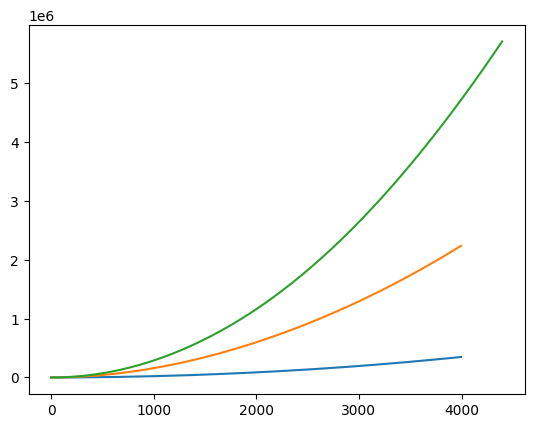

In [2]:
plt.plot(np.cumsum(np.cumsum(np.abs(np.cumsum(grad_pulse_05Hz)))))
plt.plot(np.cumsum(np.cumsum(np.abs(np.cumsum(grad_pulse_1Hz)))))
plt.plot(np.cumsum(np.cumsum(np.abs(np.cumsum(grad_pulse_2Hz)))))
plt.show()

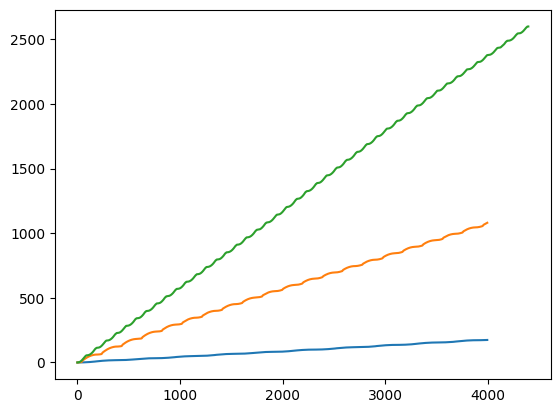

In [3]:
flow_05 = np.cumsum(np.abs(np.cumsum(grad_pulse_05Hz)))
flow_1 = np.cumsum(np.abs(np.cumsum(grad_pulse_1Hz)))
flow_2 = np.cumsum(np.abs(np.cumsum(grad_pulse_2Hz)))

plt.plot(flow_05)
plt.plot(flow_1)
plt.plot(flow_2)
plt.show()

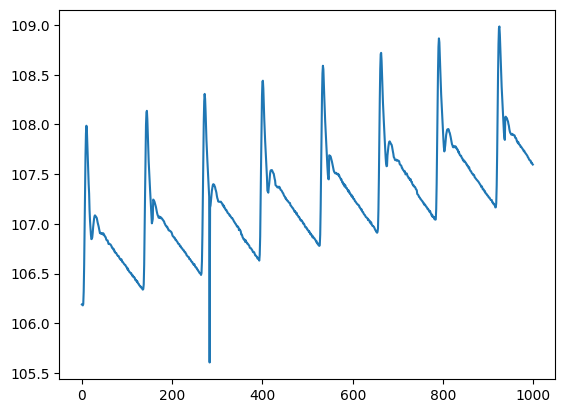

In [7]:
df_short = pd.read_csv('data/short/1.csv', index_col=None, header=None)
v_s = df_short.to_numpy().flatten()
get_smoothed_pulses(v_s)

plt.plot(v_s[5000:6000])
plt.show();